In [1]:
#Importing necessary Library

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#Loading dataset
data = pd.read_csv("C:\\Users\\vishw\\OneDrive\\Desktop\\ML project\\weather forecaste\\DailyDelhiClimateTrain.csv")

#Displaying first few rows of dataset
print(data.head())

         date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [3]:
print(data.describe())

         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   95.833333   19.314286   1022.809524


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          114 non-null    object 
 1   meantemp      114 non-null    float64
 2   humidity      114 non-null    float64
 3   wind_speed    114 non-null    float64
 4   meanpressure  114 non-null    float64
dtypes: float64(4), object(1)
memory usage: 4.6+ KB
None


In [15]:
figure = px.line(data, x="date", y="meantemp",
                 title= "Mean tempratuer in delhi overall on years")
figure.show()

In [16]:
figure = px.line(data, x="date", y="humidity",
                 title= "Humidity in delhi overall on years")
figure.show()

In [17]:
figure = px.line(data, x="date", y="wind_speed",
                 title= "Wind Speed in delhi overall on years")
figure.show()

In [5]:
figure = px.scatter(data_frame = data, x="humidity", y="meantemp", trendline="ols",
                    title="Relationship between Temapratuer and Humidity")
figure.show()

In [12]:
#Formating date and time

data ["date"] = pd.to_datetime(data["date"], format = '%Y-%m-%d')
data ['year'] = data['date'].dt.year
data ["month"] = data["date"].dt.month
print(data.head())

        date   meantemp   humidity  wind_speed  meanpressure  year  month
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1


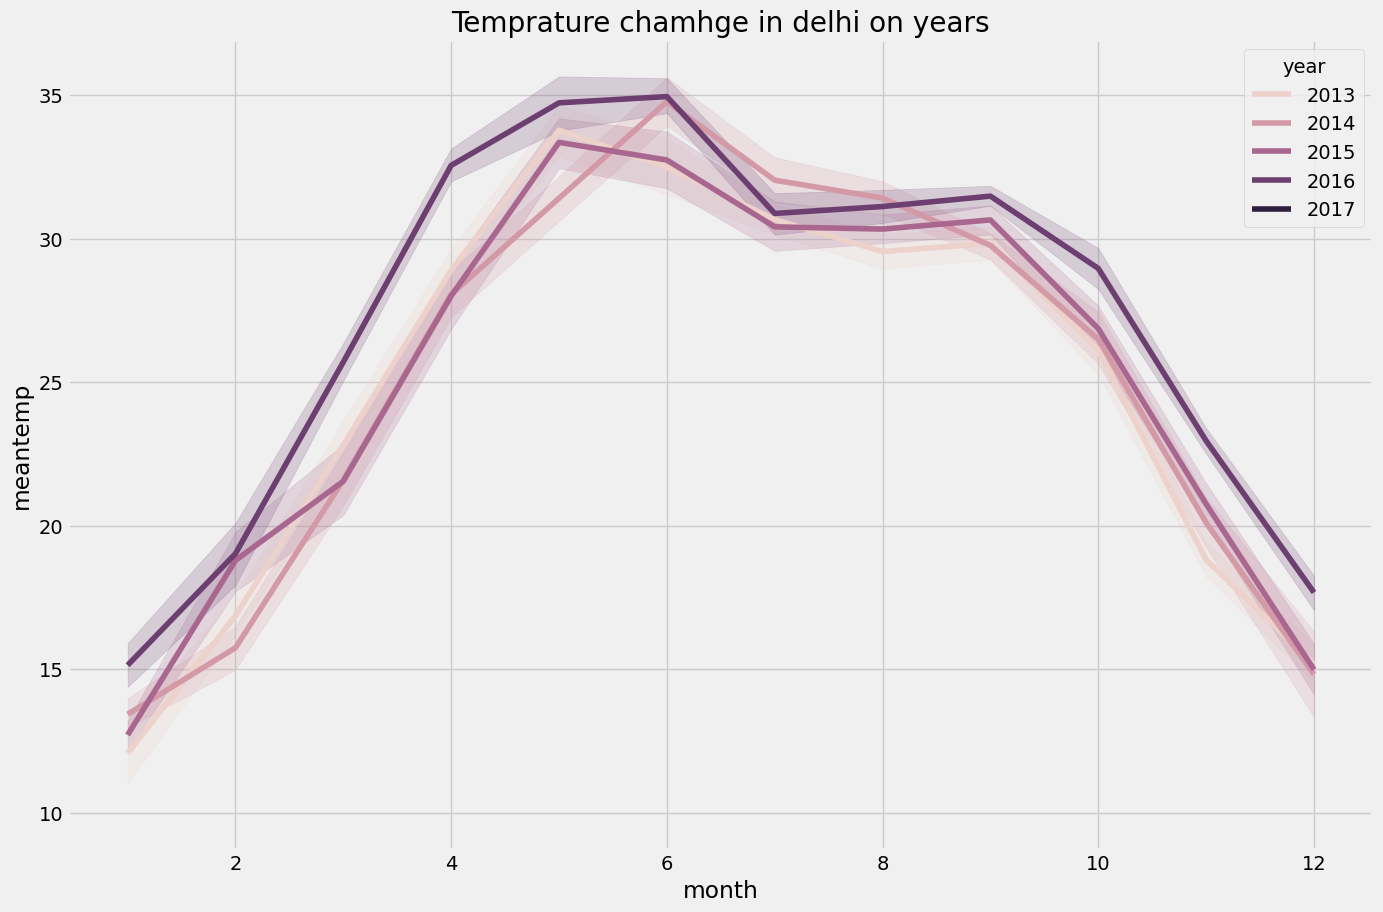

In [18]:
#Analysing Temprature Change

plt.style.use('fivethirtyeight')
plt.figure(figsize=(15, 10))
plt.title("Temprature chamhge in delhi on years")
sns.lineplot(data = data, x='month', y='meantemp', hue='year')
plt.show()

In [9]:
#Forecasting using Python

forecast_data = data.rename(columns = {"date":"ds","meantemp":"y"})
print(forecast_data)

              ds          y    humidity  wind_speed  meanpressure
0     2013-01-01  10.000000   84.500000    0.000000   1015.666667
1     2013-01-02   7.400000   92.000000    2.980000   1017.800000
2     2013-01-03   7.166667   87.000000    4.633333   1018.666667
3     2013-01-04   8.666667   71.333333    1.233333   1017.166667
4     2013-01-05   6.000000   86.833333    3.700000   1016.500000
...          ...        ...         ...         ...           ...
1457  2016-12-28  17.217391   68.043478    3.547826   1015.565217
1458  2016-12-29  15.238095   87.857143    6.000000   1016.904762
1459  2016-12-30  14.095238   89.666667    6.266667   1017.904762
1460  2016-12-31  15.052632   87.000000    7.325000   1016.100000
1461  2017-01-01  10.000000  100.000000    0.000000   1016.000000

[1462 rows x 5 columns]


In [14]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly
model = Prophet()
model.fit(forecast_data)
forecasts = model.make_future_dataframe(periods=365)
predictions = model.predict(forecasts)
plot_plotly(model, predictions)

20:51:23 - cmdstanpy - INFO - Chain [1] start processing
20:51:24 - cmdstanpy - INFO - Chain [1] done processing
